In [1]:
import numpy as np
from numpy import fft,pi
import scipy.signal

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

import ps_utils_new
import imp
imp.reload(ps_utils_new)
from ps_utils_new import Image
from plot_styling import dark

In [2]:
matplotlib.rcParams.update({'font.size': 18})
plt.rc('font', family='Helvetica')
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True

In [3]:
analysis_root = '/volumes/abraham/xcor_data/analysis/'
labels = ['02a57639o0352I','02a57639o0356I','02a57639o0342I','02a57639o0346I']
num_frames = len(labels)
notes = ['patchy bg','smooth bg','smooth bg','patchy bg']

images_mask_artifacts = [Image(analysis_root+label+'/'+label+'_mask_artifacts_coarse.fits') for label in labels]
images_mask_artifacts_sources = [Image(analysis_root+label+'/'+label+'_mask_artifacts_sources_coarse.fits') for label in labels]

loading /volumes/abraham/xcor_data/analysis/02a57639o0352I/02a57639o0352I_mask_artifacts_coarse.fits
loading /volumes/abraham/xcor_data/analysis/02a57639o0356I/02a57639o0356I_mask_artifacts_coarse.fits
loading /volumes/abraham/xcor_data/analysis/02a57639o0342I/02a57639o0342I_mask_artifacts_coarse.fits
loading /volumes/abraham/xcor_data/analysis/02a57639o0346I/02a57639o0346I_mask_artifacts_coarse.fits
loading /volumes/abraham/xcor_data/analysis/02a57639o0352I/02a57639o0352I_mask_artifacts_sources_coarse.fits
loading /volumes/abraham/xcor_data/analysis/02a57639o0356I/02a57639o0356I_mask_artifacts_sources_coarse.fits
loading /volumes/abraham/xcor_data/analysis/02a57639o0342I/02a57639o0342I_mask_artifacts_sources_coarse.fits
loading /volumes/abraham/xcor_data/analysis/02a57639o0346I/02a57639o0346I_mask_artifacts_sources_coarse.fits


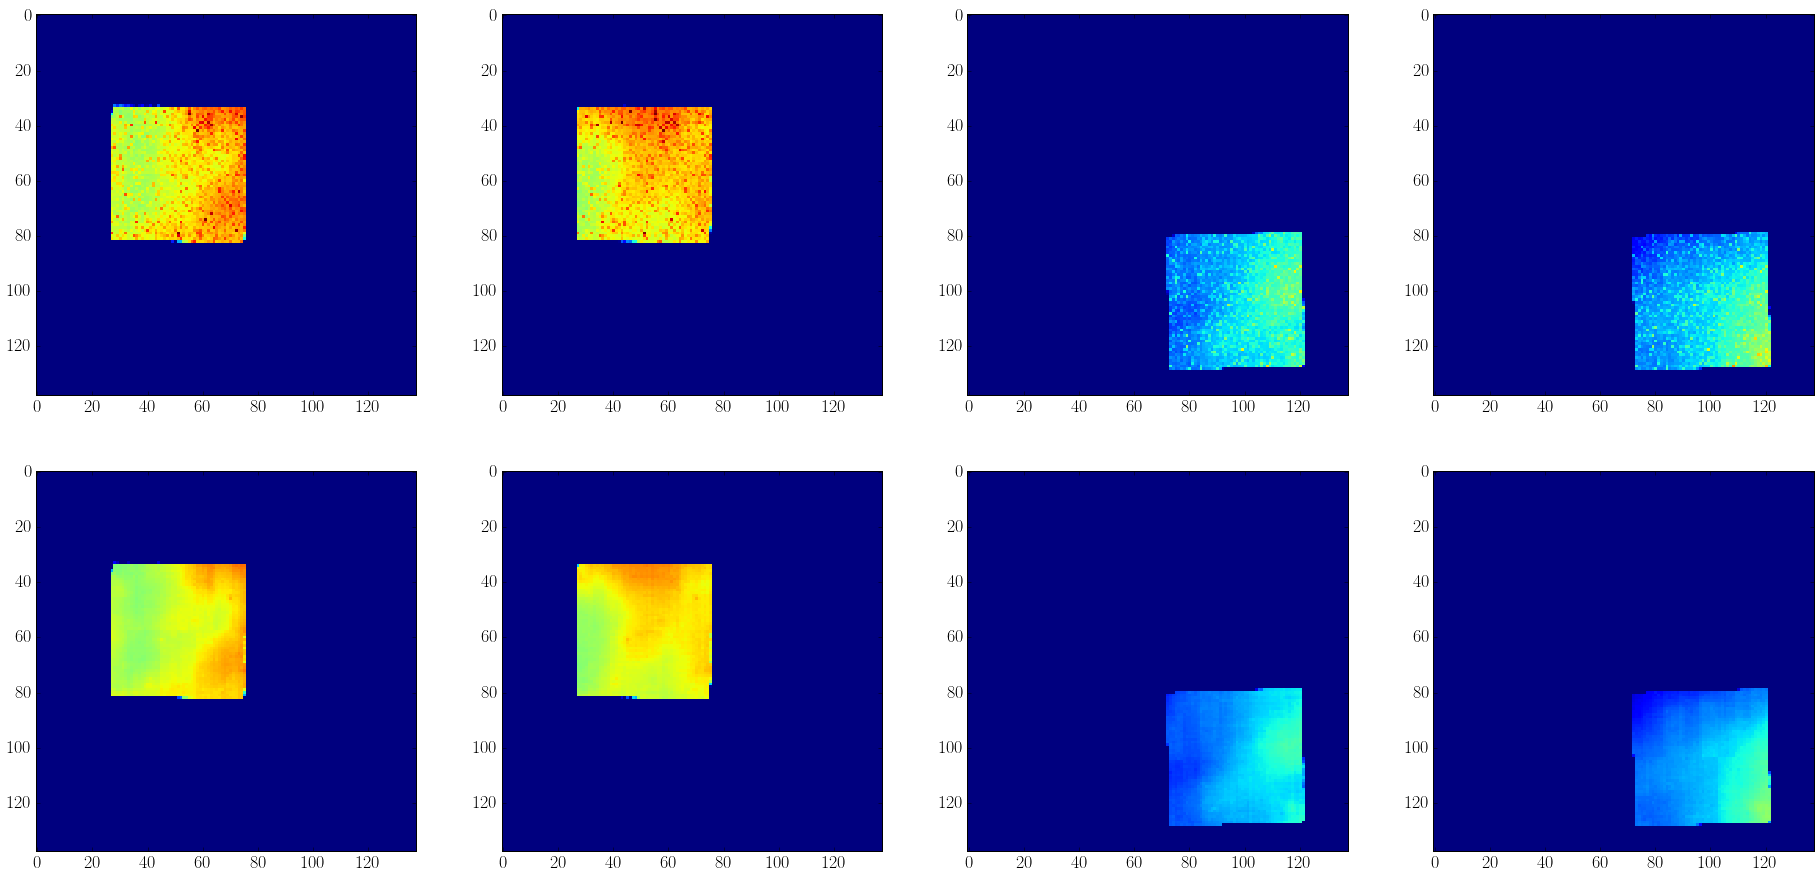

In [4]:
v1=2.75e3
v2=3.25e3

plt.figure(figsize=(32,15))

for framei in range(num_frames):
    plt.subplot(2,num_frames,framei+1)
    plt.imshow(images_mask_artifacts[framei].full_kjy_per_sr,vmin=v1,vmax=v2,interpolation='nearest')
    
    plt.subplot(2,num_frames,num_frames+framei+1)
    plt.imshow(images_mask_artifacts_sources[framei].full_kjy_per_sr,vmin=v1,vmax=v2,interpolation='nearest')

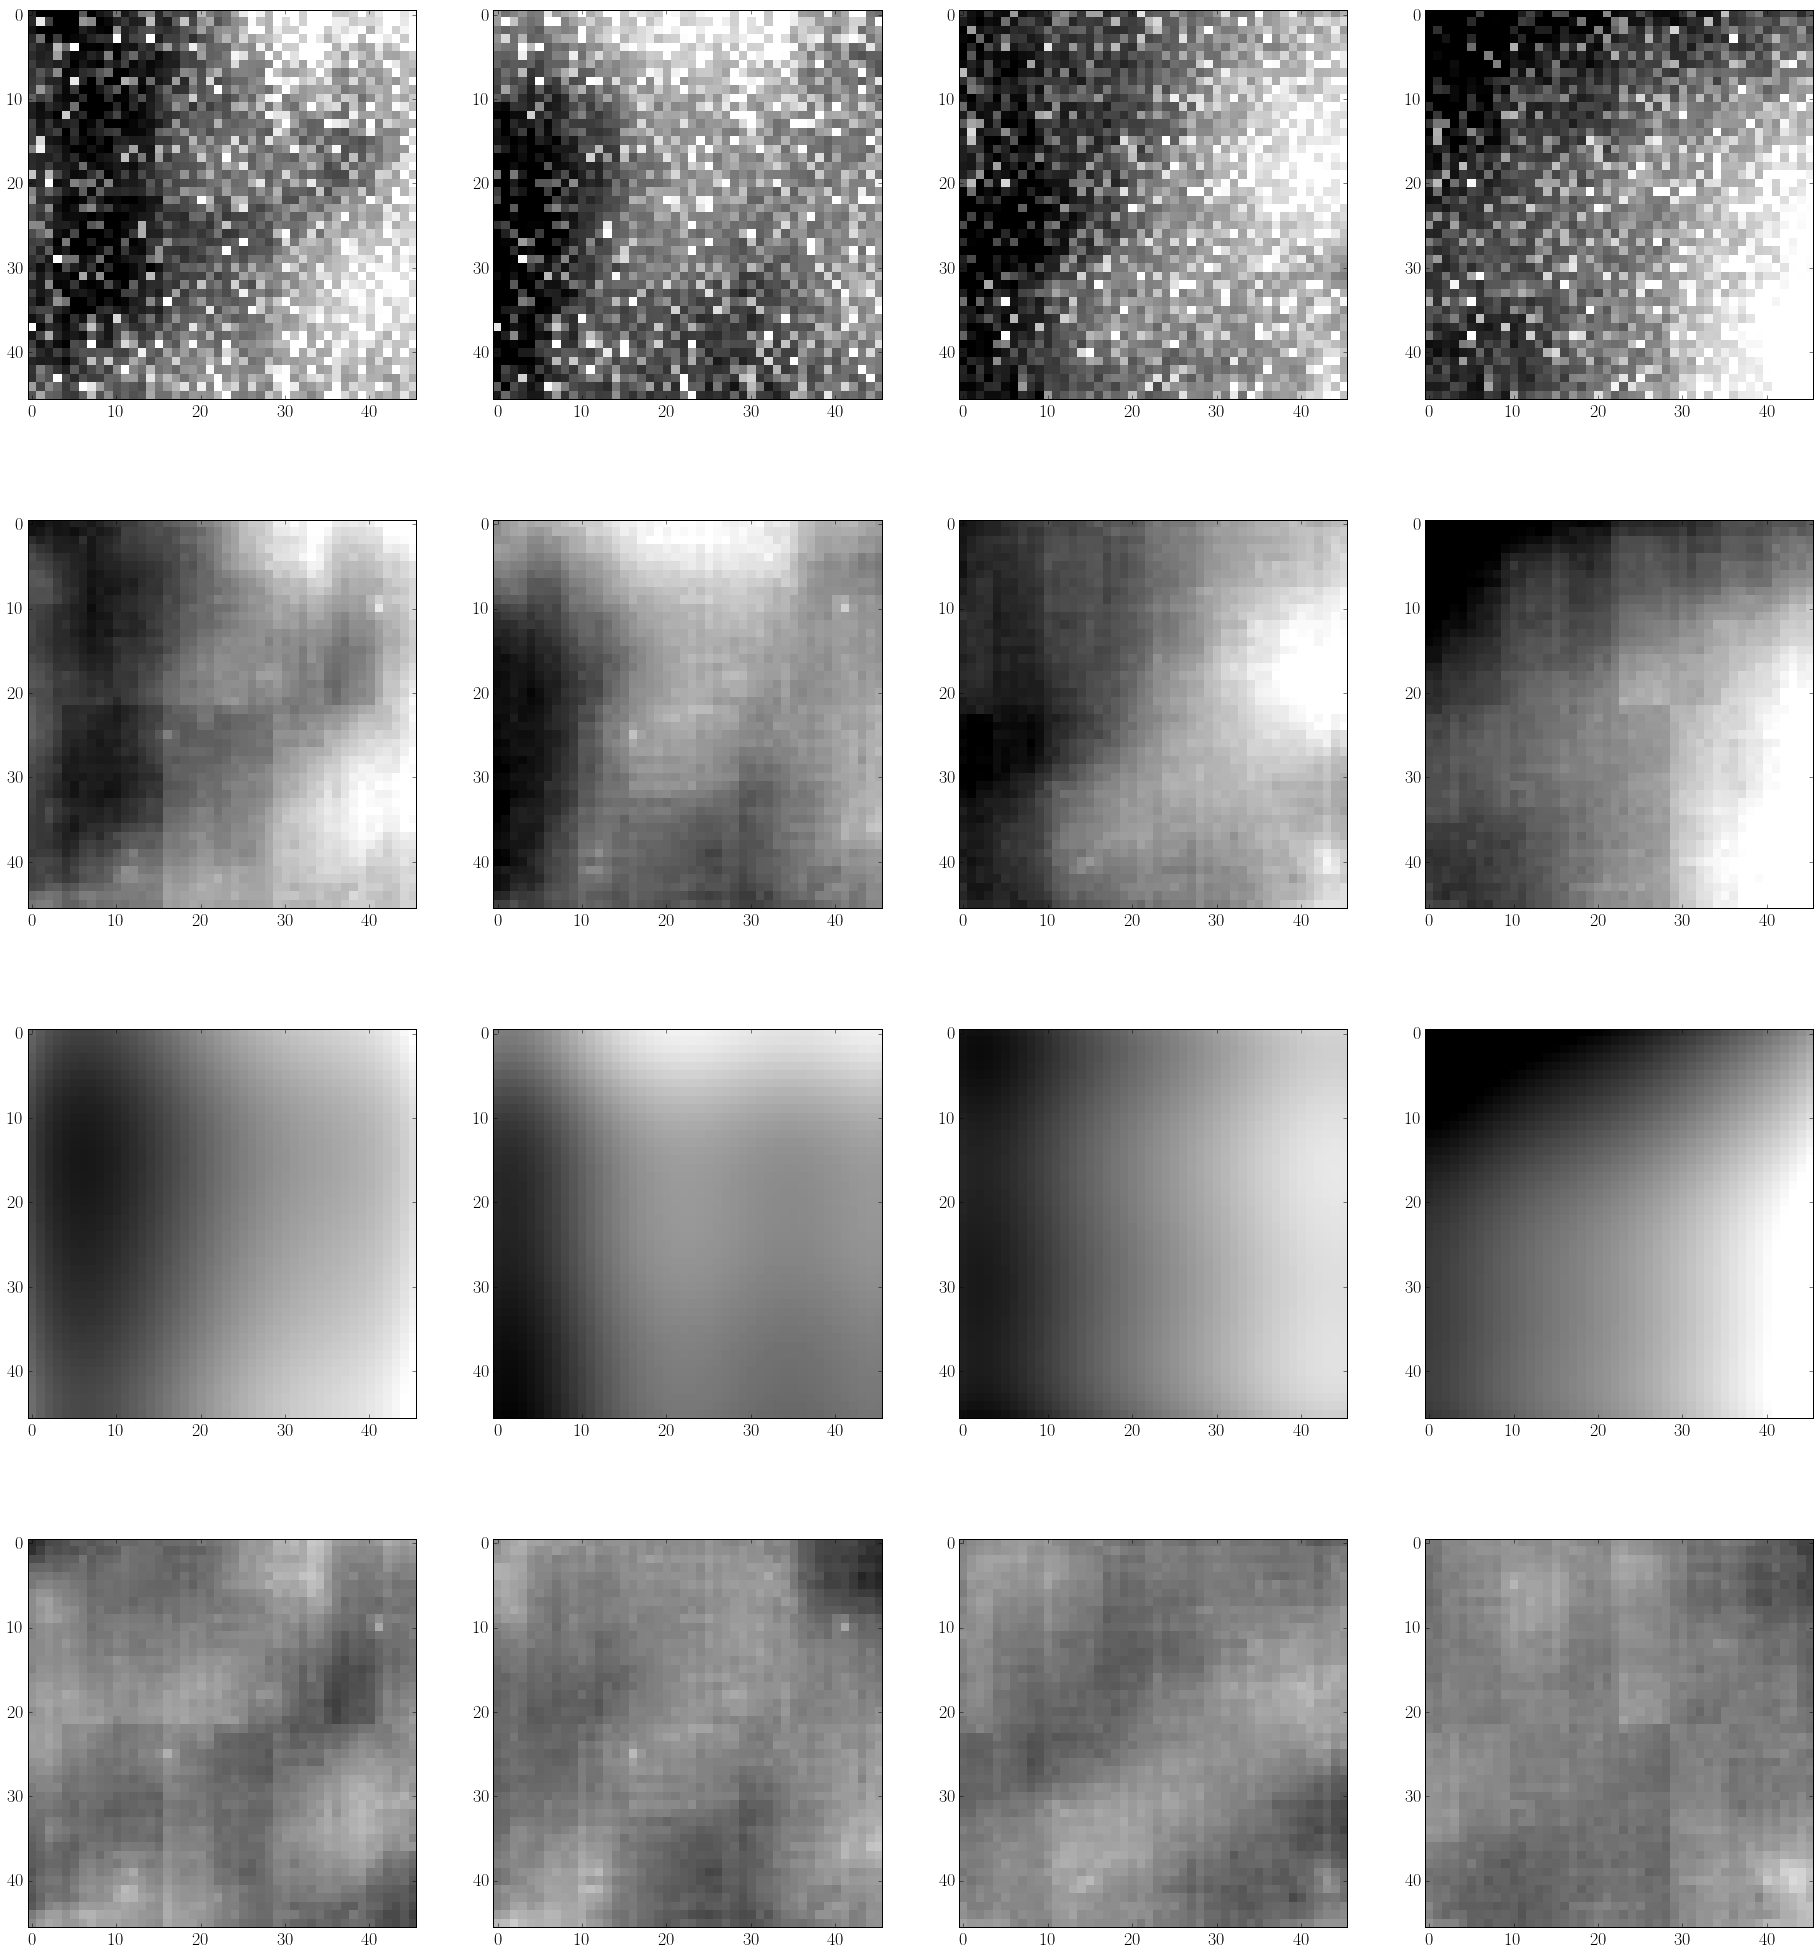

In [23]:
v1=-60
v2=60

cm = 'gray'

plt.figure(figsize=(32,35))
for framei in range(num_frames):
    plt.subplot(4,num_frames,framei+1)
    plt.imshow(images_mask_artifacts[framei].frame_kjy_per_sr-images_mask_artifacts[framei].frame_kjy_per_sr.mean(),vmin=v1,vmax=v2,interpolation='nearest',cmap=cm)
    
    plt.subplot(4,num_frames,num_frames+framei+1)
    plt.imshow(images_mask_artifacts_sources[framei].frame_kjy_per_sr-images_mask_artifacts_sources[framei].frame_kjy_per_sr.mean(),vmin=v1,vmax=v2,interpolation='nearest',cmap=cm)
    
    plt.subplot(4,num_frames,2*num_frames+framei+1)
    plt.imshow(images_mask_artifacts_sources[framei].model_frame_kjy_per_sr-images_mask_artifacts_sources[framei].model_frame_kjy_per_sr.mean(),vmin=v1,vmax=v2,interpolation='nearest',cmap=cm)
    
    plt.subplot(4,num_frames,3*num_frames+framei+1)
    plt.imshow(images_mask_artifacts_sources[framei].res_frame_kjy_per_sr,vmin=v1,vmax=v2,interpolation='nearest',cmap=cm)

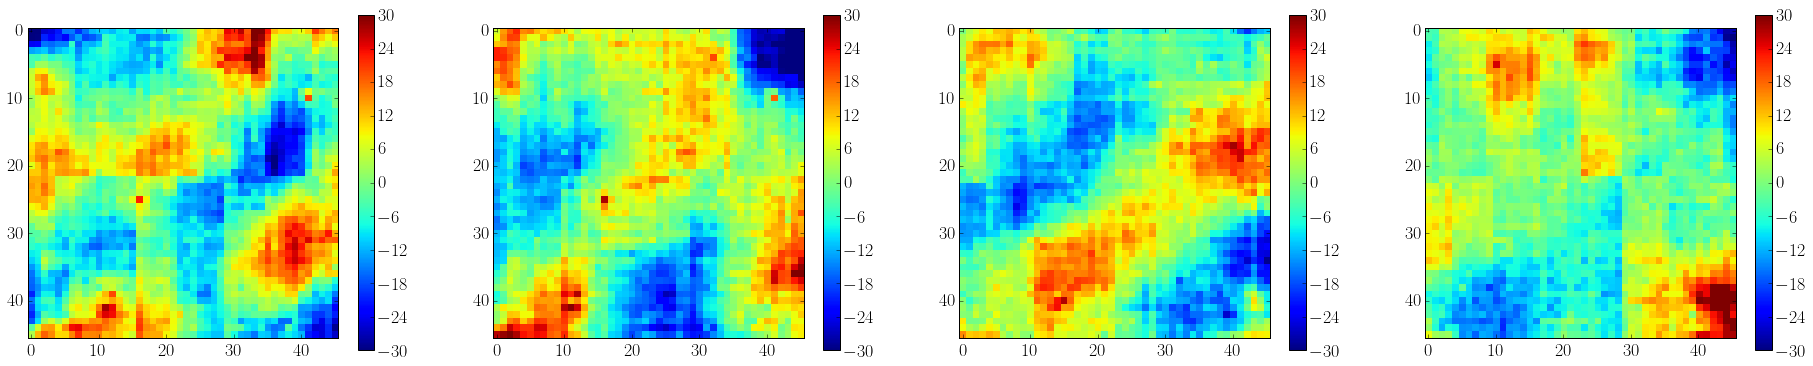

In [9]:
v1=-30
v2=30

cm = 'jet'

plt.figure(figsize=(32,6))
for framei in range(num_frames):
    plt.subplot(1,num_frames,framei+1)
    plt.imshow(images_mask_artifacts_sources[framei].res_frame_kjy_per_sr,vmin=v1,vmax=v2,interpolation='nearest',cmap=cm)
    plt.colorbar()

In [24]:
# # EXPERIMENT WITH SUBTRACTING A LOW ORDER 2D POLYNOMIAL

# v1=2.85e3
# v2=3.15e3

# x = np.linspace(0, 1, images_mask_artifacts_sources[0].n)
# y = np.linspace(0, 1, images_mask_artifacts_sources[0].n)
# Xg, Yg = np.meshgrid(x, y, copy=False)
# X = Xg.flatten()
# Y = Yg.flatten()

# # def poly2(x, a, b, c):
# #      return a * np.exp(-b * x) + c
    
# plt.figure(figsize=(32,15))
# for framei in range(num_frames):
#     scipy.optimize.curve_fit(f, xdata, ydata, p0=None)
    
#     plt.subplot(1,num_frames,framei+1)
#     plt.imshow(,vmin=v1,vmax=v2,interpolation='nearest')

In [25]:
# LOAD LITERATURE IR POWER SPECTRA (Zemcov+ 14)

d = '/Users/abrahamn/Documents/MIT/21cm/21cmIR/2016/may/zemcov14_data/'
ell_Cell_ciber = genfromtxt(d+'zemcov14_CIBER_data_Cl.txt',skip_header=1,delimiter=',')
ell_Cell_eormodel = genfromtxt(d+'zemcov14_eor_Cl.txt',skip_header=1,delimiter=',')

# these are in nW/m^2/sr, but I want to convert them to kJy/sr
# I have to divide by the bandwidth of 0.5um
lamda_m = 1.1e-6
freq_Hz = 3.e8/lamda_m
convert_to_kJy_per_sr = 1.e-9/freq_Hz/(1.e3*1.e-26)

ell_Cell_ciber[:,1] *= convert_to_kJy_per_sr
ell_Cell_eormodel[:,1] *= convert_to_kJy_per_sr

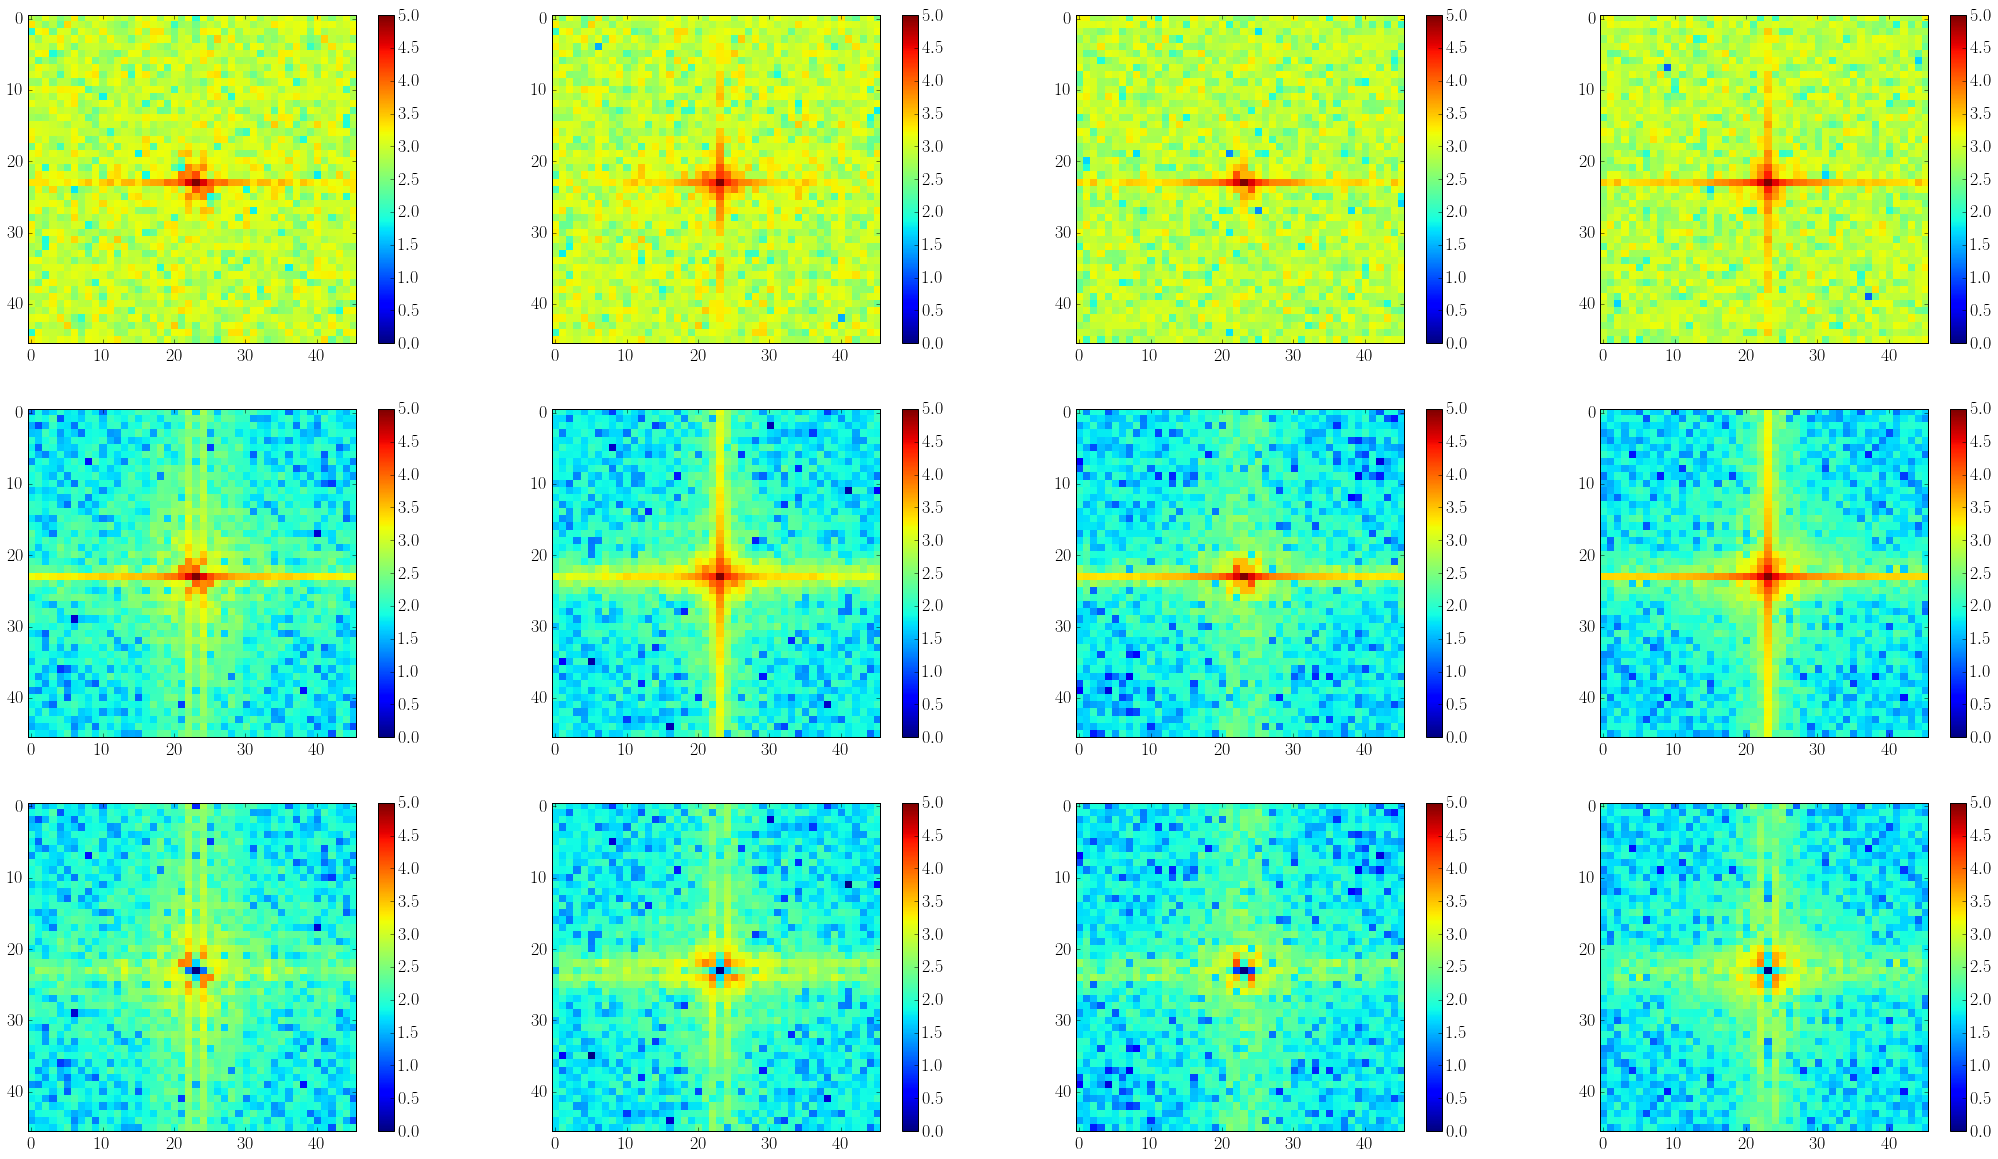

In [26]:
# LOOKING FOR SYSTEMATICS IN 2D FOURIER SPACE

v1,v2 = 0,5

plt.figure(figsize=(36,20))
for framei in range(num_frames):
    plt.subplot(3,num_frames,framei+1)
    plt.imshow(np.log10(np.abs(fft.fftshift(fft.fft2(images_mask_artifacts[framei].frame_kjy_per_sr)))),interpolation='nearest',vmin=v1,vmax=v2)
    plt.colorbar()
    
    plt.subplot(3,num_frames,num_frames+framei+1)
    plt.imshow(np.log10(np.abs(fft.fftshift(fft.fft2(images_mask_artifacts_sources[framei].frame_kjy_per_sr)))),interpolation='nearest',vmin=v1,vmax=v2)
    plt.colorbar()
    
    plt.subplot(3,num_frames,2*num_frames+framei+1)
    plt.imshow(np.log10(np.abs(fft.fftshift(fft.fft2(images_mask_artifacts_sources[framei].res_frame_kjy_per_sr)))),interpolation='nearest',vmin=v1,vmax=v2)
    plt.colorbar()

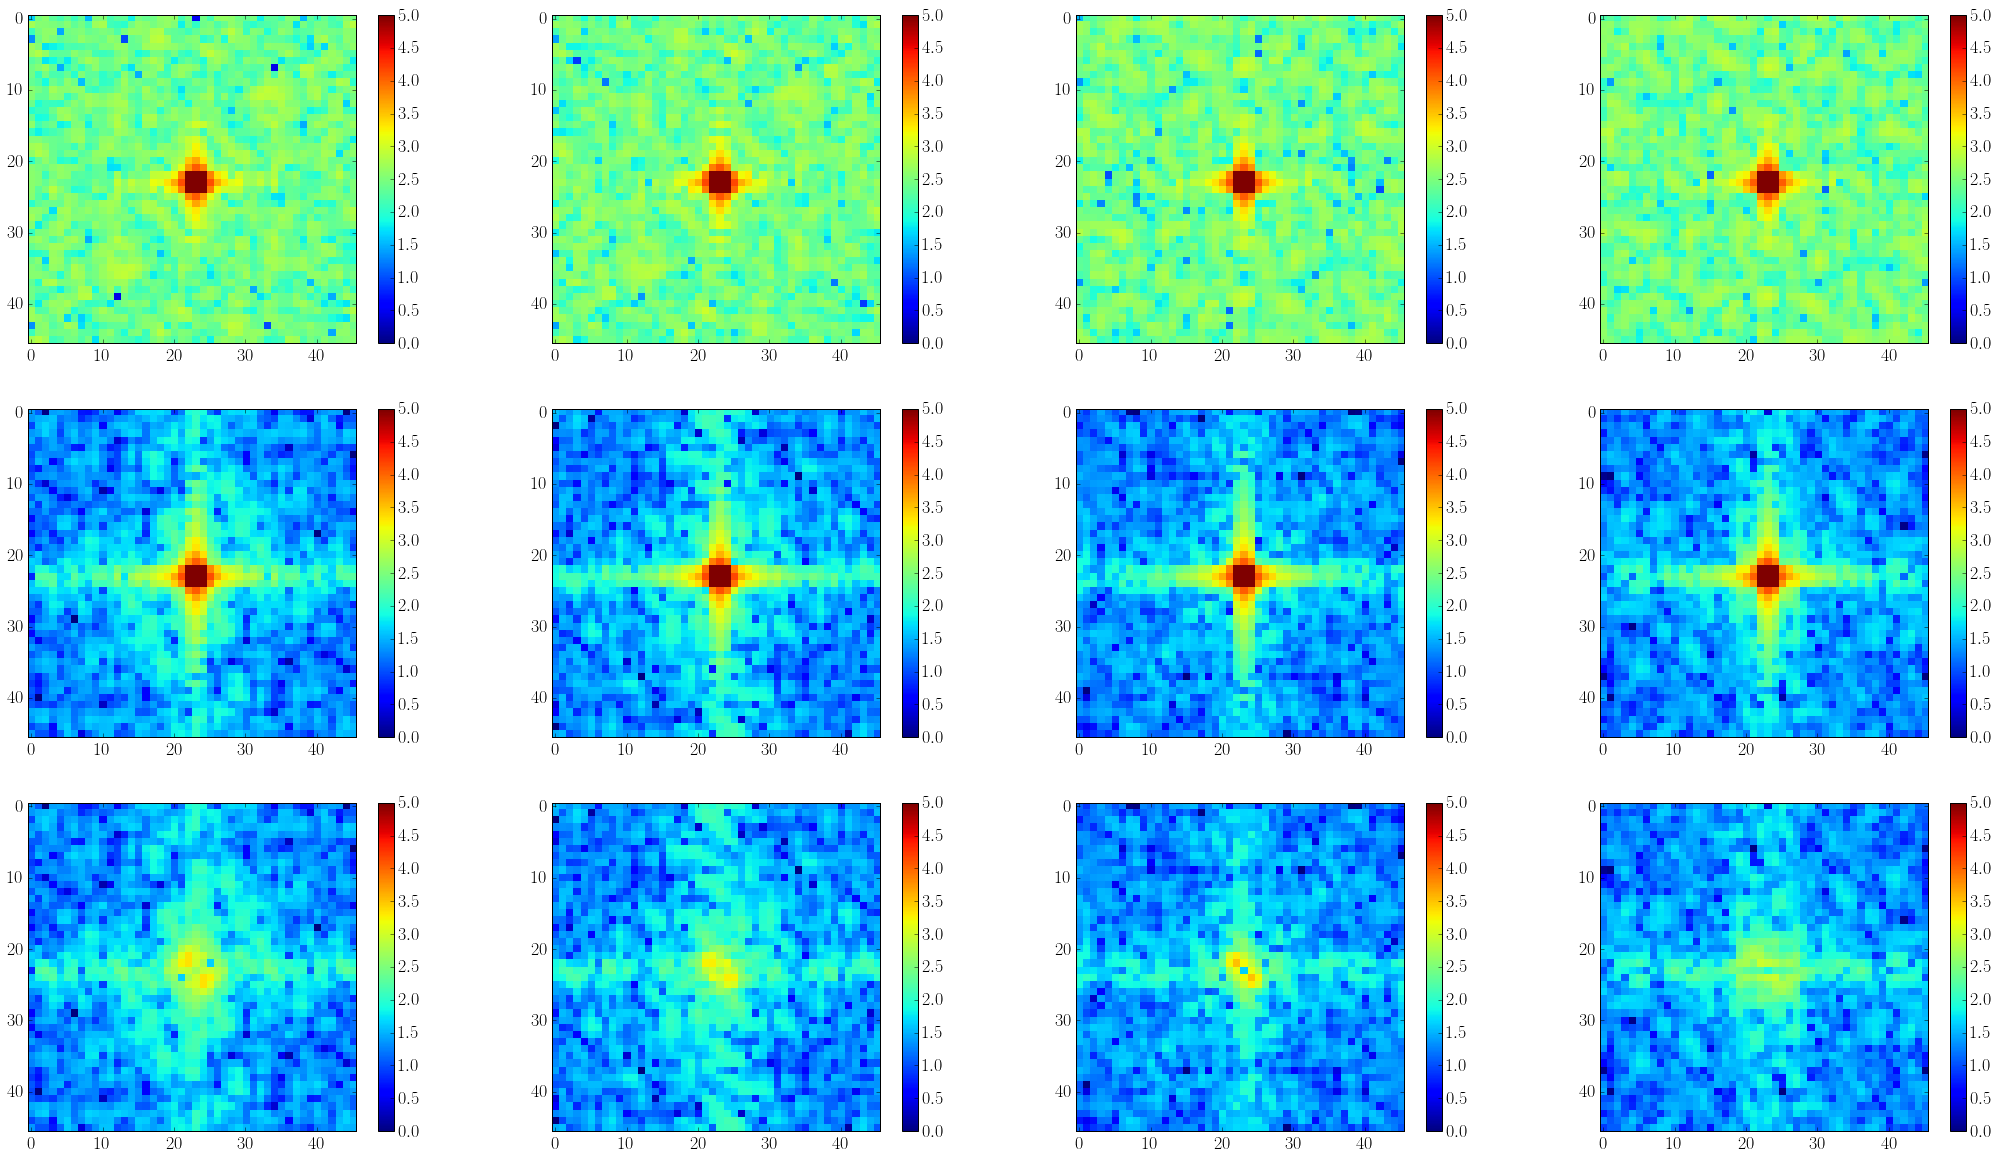

In [27]:
w = scipy.signal.hann(images_mask_artifacts[0].n)
wx,wy = np.meshgrid(w,w)
w2 = wx*wy

# LOOKING FOR SYSTEMATICS IN 2D FOURIER SPACE

v1,v2 = 0,5

plt.figure(figsize=(36,20))
for framei in range(num_frames):
    plt.subplot(3,num_frames,framei+1)
    plt.imshow(np.log10(np.abs(fft.fftshift(fft.fft2(w2*images_mask_artifacts[framei].frame_kjy_per_sr)))),interpolation='nearest',vmin=v1,vmax=v2)
    plt.colorbar()
    
    plt.subplot(3,num_frames,num_frames+framei+1)
    plt.imshow(np.log10(np.abs(fft.fftshift(fft.fft2(w2*images_mask_artifacts_sources[framei].frame_kjy_per_sr)))),interpolation='nearest',vmin=v1,vmax=v2)
    plt.colorbar()
    
    plt.subplot(3,num_frames,2*num_frames+framei+1)
    plt.imshow(np.log10(np.abs(fft.fftshift(fft.fft2(w2*images_mask_artifacts_sources[framei].res_frame_kjy_per_sr)))),interpolation='nearest',vmin=v1,vmax=v2)
    plt.colorbar()

In [28]:
nbins = 15
lmax = 2000

img.mean() = 3082.96
img.mean() = 3082.96
img.mean() = 3058.66
img.mean() = 3058.66
img.mean() = 3058.66
img.mean() = 3058.66
img.mean() = 3.88073923591e-05
img.mean() = 3093.61
img.mean() = 3093.61
img.mean() = 3069.31
img.mean() = 3069.31
img.mean() = 3069.31
img.mean() = 3069.31
img.mean() = -2.58360928868e-05
img.mean() = 2921.02
img.mean() = 2921.02
img.mean() = 2898.11
img.mean() = 2898.11
img.mean() = 2898.11
img.mean() = 2898.11
img.mean() = 5.0206532194e-05
img.mean() = 2920.38
img.mean() = 2920.38
img.mean() = 2897.52
img.mean() = 2897.52
img.mean() = 2897.52
img.mean() = 2897.52
img.mean() = 0.000379405122014
['', '', '', '', '', '', '']


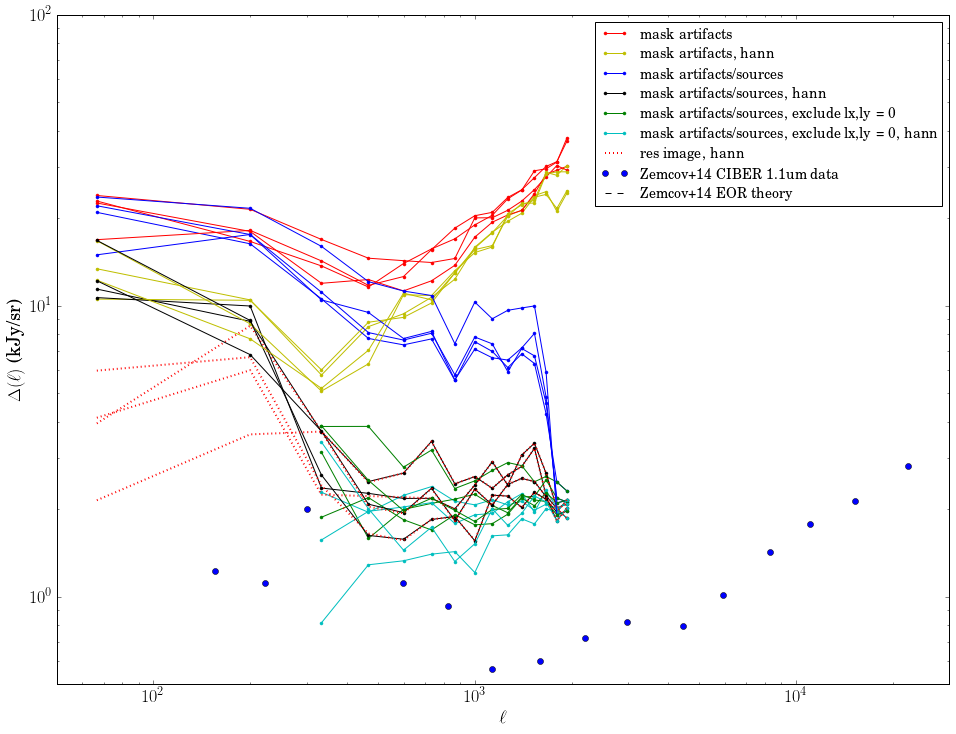

In [29]:
# MASKING STUDY: COMPARING POWER SPECTRA

imp.reload(ps_utils_new)

plt.figure(figsize=(16,12))

legendlabels = ['mask artifacts','mask artifacts, hann','mask artifacts/sources','mask artifacts/sources, hann','mask artifacts/sources, exclude lx,ly = 0','mask artifacts/sources, exclude lx,ly = 0, hann','res image, hann']
for framei in range(num_frames):
    if framei > 0: legendlabels = ['','','','','','','']
    
    lbins,Cl,counts = ps_utils_new.image2PS(images_mask_artifacts[framei],nbins,lmax,backsub=True,hann=False)
    plt.loglog(lbins,sqrt(lbins**2*Cl/(2*pi)),'r.-',label=legendlabels[0])
    
    lbins,Cl,counts = ps_utils_new.image2PS(images_mask_artifacts[framei],nbins,lmax,backsub=True,hann=True)
    plt.loglog(lbins,sqrt(lbins**2*Cl/(2*pi)),'y.-',label=legendlabels[1])
    
    lbins,Cl,counts = ps_utils_new.image2PS(images_mask_artifacts_sources[framei],nbins,lmax,backsub=True,hann=False)
    plt.loglog(lbins,sqrt(lbins**2*Cl/(2*pi)),'b.-',label=legendlabels[2])
    
    lbins,Cl,counts = ps_utils_new.image2PS(images_mask_artifacts_sources[framei],nbins,lmax,backsub=True,hann=True)
    plt.loglog(lbins,sqrt(lbins**2*Cl/(2*pi)),'k.-',label=legendlabels[3])
    
    lbins,Cl,counts = ps_utils_new.image2PS(images_mask_artifacts_sources[framei],nbins,lmax,backsub=True,hann=False,exclude_lx_or_ly_zero=True)
    plt.loglog(lbins,sqrt(lbins**2*Cl/(2*pi)),'g.-',label=legendlabels[4])
    
    lbins,Cl,counts = ps_utils_new.image2PS(images_mask_artifacts_sources[framei],nbins,lmax,backsub=True,hann=True,exclude_lx_or_ly_zero=True)
    plt.loglog(lbins,sqrt(lbins**2*Cl/(2*pi)),'c.-',label=legendlabels[5])
    
    lbins,Cl,counts = ps_utils_new.image2PS(images_mask_artifacts_sources[framei],nbins,lmax,hann=True,use_res_image=True)
    plt.loglog(lbins,sqrt(lbins**2*Cl/(2*pi)),'r:',label=legendlabels[6],linewidth=2)

print(legendlabels)
    
plt.loglog(ell_Cell_ciber[:,0],ell_Cell_ciber[:,1],'bo',label='Zemcov+14 CIBER 1.1um data')
plt.loglog(ell_Cell_eormodel[:,0],ell_Cell_eormodel[:,1],'k--',label='Zemcov+14 EOR theory')

plt.xlabel(ur'$\ell$')
plt.ylabel(ur'$\Delta(\ell)$ \text{(kJy/sr)}')
plt.xlim([50,3.e4])
plt.ylim([.5,100])
plt.legend(fontsize=14)

#dark(title='Power spectra of ATLAS I band frames',fontsize=18)

#plt.savefig('power_spectra_after_binning_masking_cropping.pdf',bbox_inches='tight')

# plt.figure()
# plt.plot(lbins,counts0,'.-')
